In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time

**Пути к директориям и файлам**

In [261]:
# course test dataset
TRAIN_DATASET_PATH = 'train.csv'

# prepare dataset
PREP_DATASET_PATH = 'prep_dataset.csv'

# prepare dataset_test
PREP_DATASET_PATH_TEST = 'prep_dataset_test.csv'

# course train dataset
TEST_DATASET_PATH = 'test.csv'

In [262]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [263]:
df_train.shape

(10000, 13)

In [264]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [265]:
df_test.shape

(10000, 12)

### Обзор данных<a class="anchor" id="review"></a>

In [266]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.7 KB


In [267]:
df_train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [268]:
df_test.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14999.50000,45.924500,1.985700,1699.910000,1.702300,0.372100,0.128100,0.115800,0.049000,0.029200,0.015100,64.149400
std,2886.89568,8.031977,1.771217,526.260094,0.789644,0.483389,0.334218,0.320001,0.215879,0.168375,0.121957,13.570096
min,10000.00000,23.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,12499.75000,41.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,14999.50000,46.000000,2.000000,1550.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,17499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,19999.00000,68.000000,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000


### Обработка пропусков

In [269]:
len(df_train) - df_train.count()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
choose                 0
dtype: int64

In [270]:
len(df_test) - df_test.count()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

###### Пропусков нет

### Проверка на выбросы

<function matplotlib.pyplot.show(*args, **kw)>

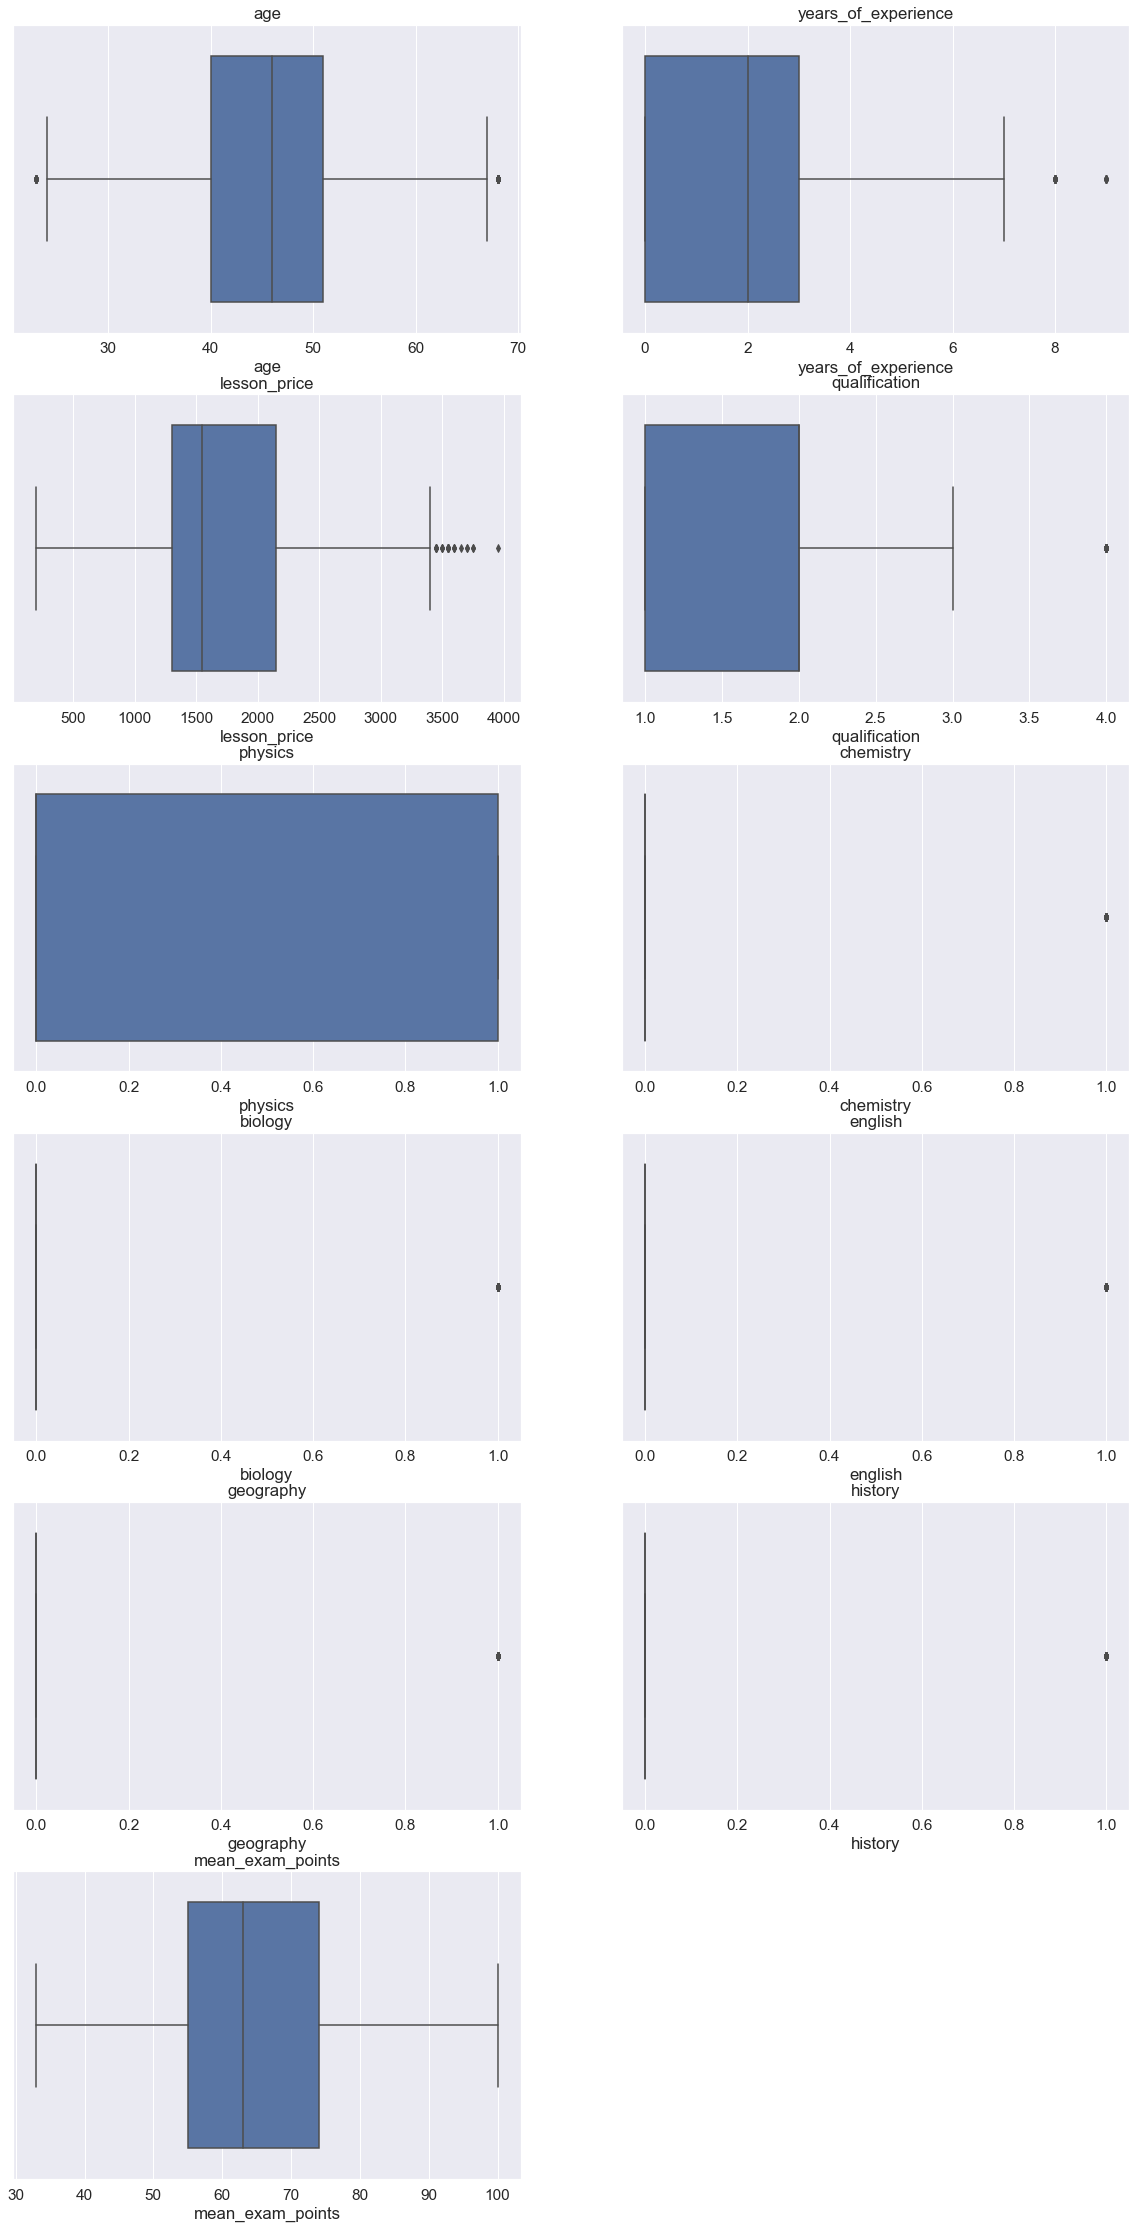

In [271]:
TARGET_NAME = 'choose'
BASE_FEATURE_NAMES = df_train.columns.drop(['choose','Id']).tolist()
sns.set(font_scale=1.4)
plt.figure(figsize=(20,60))
for i, colname in enumerate(BASE_FEATURE_NAMES):
    plt.subplot(9,2,i+1)
    plt.title(colname)
    sns.boxplot(df_train[colname])

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

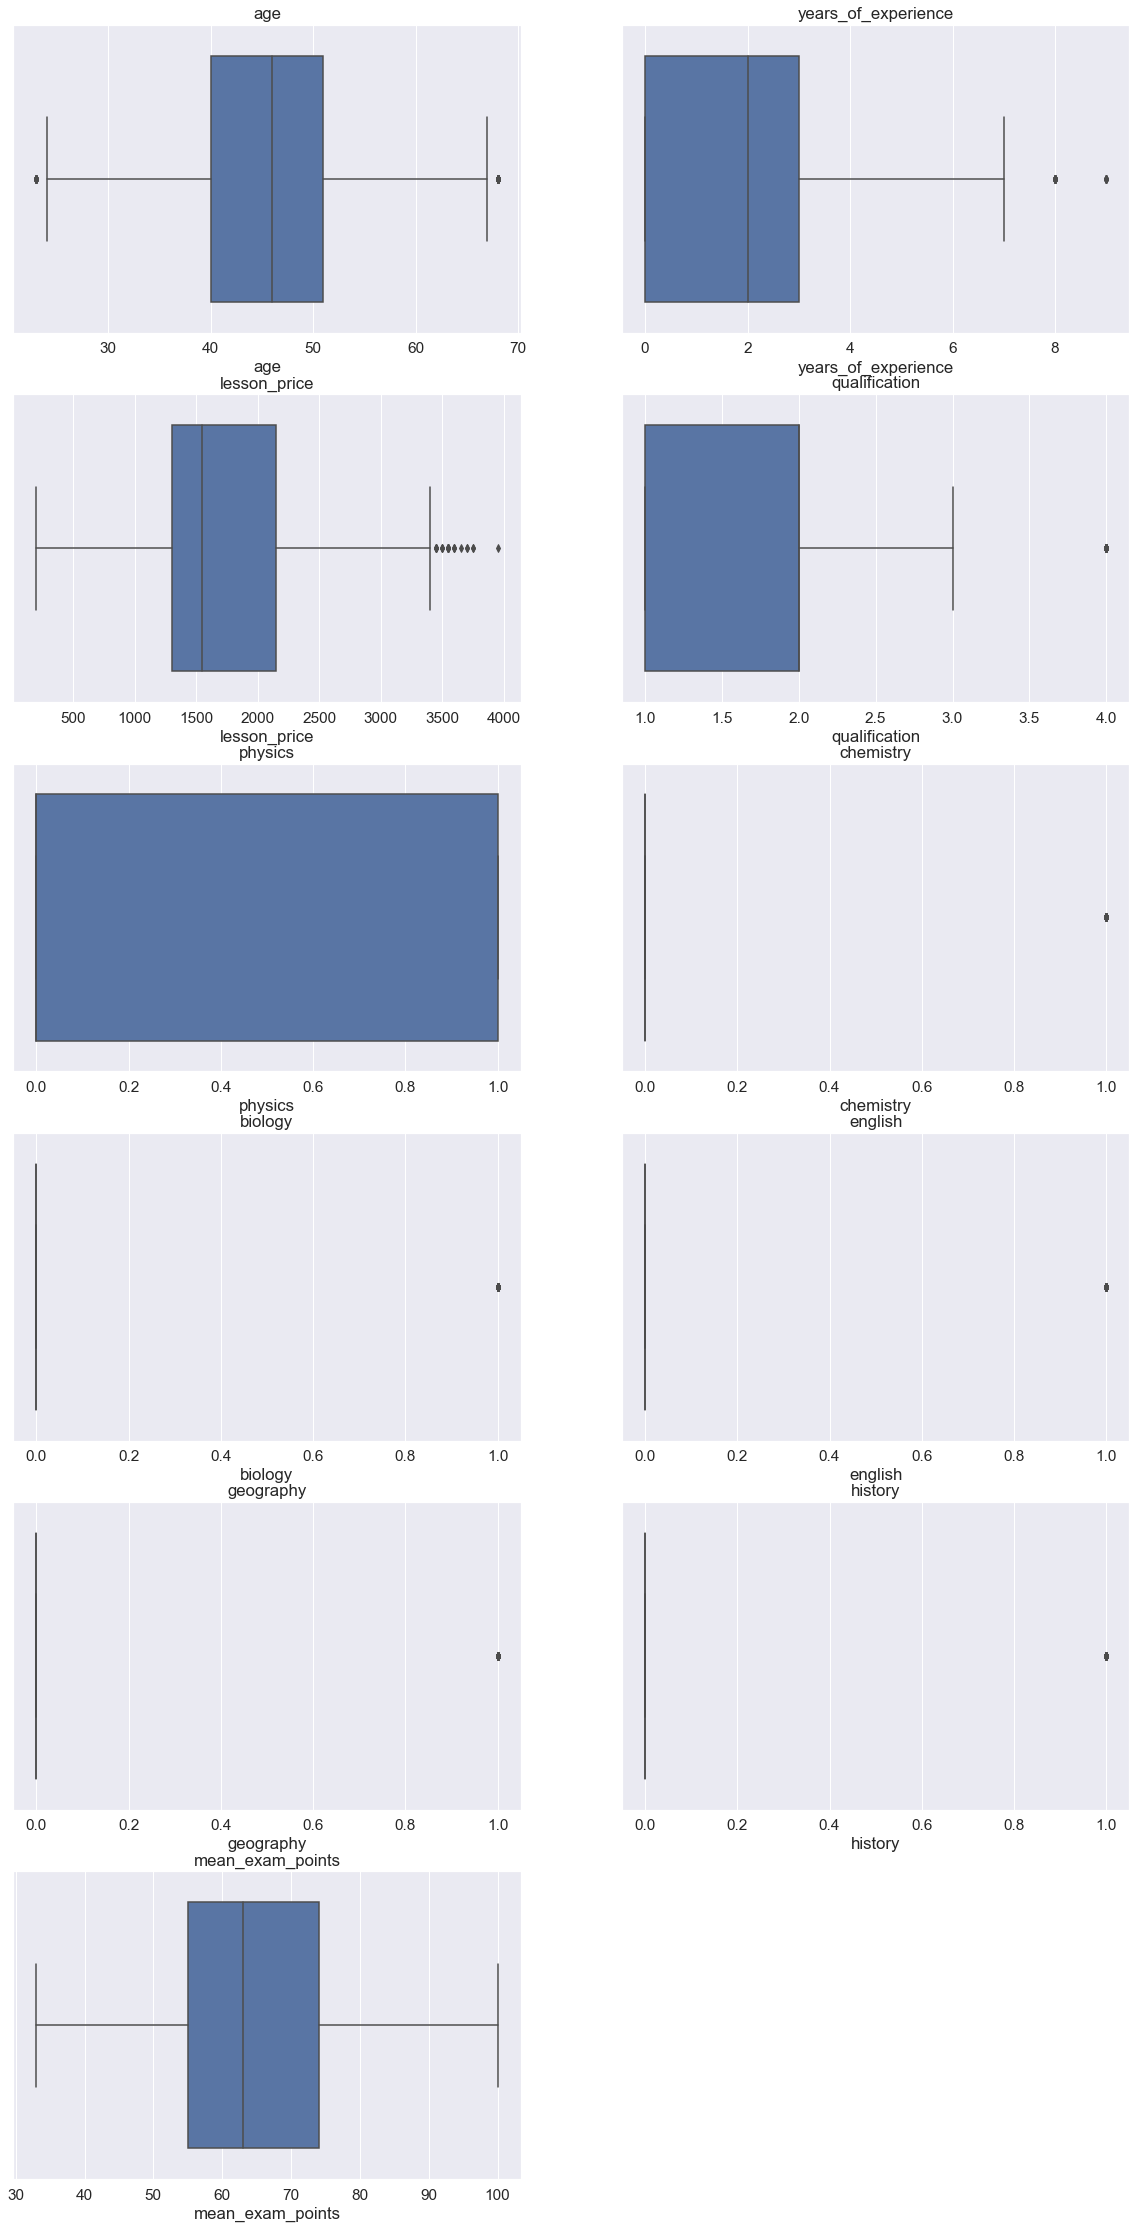

In [272]:
BASE_FEATURE_NAMES = df_test.columns.drop(['Id']).tolist()
sns.set(font_scale=1.4)
plt.figure(figsize=(20,60))
for i, colname in enumerate(BASE_FEATURE_NAMES):
    plt.subplot(9,2,i+1)
    plt.title(colname)
    sns.boxplot(df_train[colname])

plt.show

In [273]:
df_train['years_of_experience'].describe()

count    10000.000000
mean         1.974800
std          1.766883
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: years_of_experience, dtype: float64

In [274]:
df_train['lesson_price'].describe()

count    10000.000000
mean      1702.440000
std        523.789062
min        200.000000
25%       1300.000000
50%       1550.000000
75%       2150.000000
max       3950.000000
Name: lesson_price, dtype: float64

In [275]:
df_train['mean_exam_points'].describe()

count    10000.000000
mean        64.435200
std         13.595024
min         33.000000
25%         55.000000
50%         63.000000
75%         74.000000
max        100.000000
Name: mean_exam_points, dtype: float64

###### Выбросов значительных нет, можно переходить на реализацию алгоритмов

### Корреляция

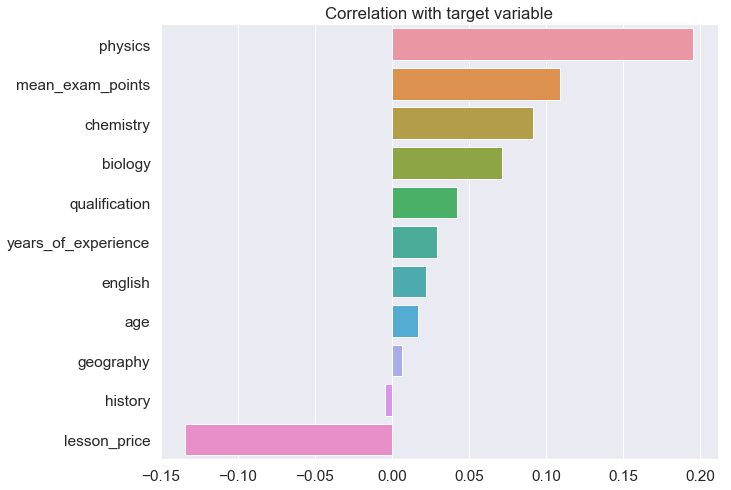

In [276]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

### Добавим новых аттрибутов

In [277]:
def add_new_feature(df_train):
    df_train['years_of_experience_bin']=0
    df_train.loc[(df_train['years_of_experience'] >=3), 'years_of_experience_bin'] = 1
    df_train['mean_exam_points_new']=0
    df_train.loc[(df_train['mean_exam_points'] >=55) | (df_train['mean_exam_points']<=65), 'mean_exam_points_new'] = 1
    df_train.loc[(df_train['mean_exam_points'] >=65), 'mean_exam_points_new'] = 2
    df_train['lesson_price_new']=0
    df_train.loc[(df_train['lesson_price'] >=1400) | (df_train['lesson_price']<=2100), 'lesson_price_new'] = 1
    df_train.loc[(df_train['lesson_price'] >=2000), 'lesson_price_new'] = 2

In [278]:
add_new_feature(df_train)

### Разбиение на train и test

In [279]:
TARGET_NAME = 'choose'
BASE_FEATURE_NAMES = df_train.columns.drop(['choose','Id']).tolist()

In [348]:
X = df_train[BASE_FEATURE_NAMES]
y = df_train[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X.values, y, shuffle=True, test_size=0.25, random_state=211)

In [349]:
def prepare_date(X):
    # Для начала отмасштабируем выборку
    X_ = X.astype(float)
    rows, cols = X_.shape
    # центрирование - вычитание из каждого значения среднего по строке
    means = X_.mean(0)
    for i in range(rows):
        for j in range(cols):
            X_[i, j] -= means[j]

    # деление каждого значения на стандартное отклонение
    std = np.std(X_, axis=0)
    for i in range(cols):
        for j in range(rows):
            X_[j][i] /= std[i]
    return X_

In [350]:
X_train = prepare_date(X_train)

In [351]:
from sklearn.tree import DecisionTreeClassifier

In [352]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

### AdaBoost

In [353]:
def adaboost(X, y, N):
    # Размер выборки
    n_objects = len(X)
    # Запишем количество классов в переменную
    n_classes = len(np.unique((y)))
    # Начальные веса деревьев
    w = np.ones(n_objects) / n_objects
    # Деревья с весами будем записывать в список
    models = []
    for n in range(N):
        # Зададим дерево и обучим его
        clf = DecisionTreeClassifier(max_depth=8)
        clf.fit(X, y, sample_weight=w)
        predictions = clf.predict(X)
        e = get_error(predictions, y)
        # отбросим дерево, если его ошибка больше 0.5
        # Запишем условие в общем виде (применимо к небинарным классификаторам)
        if e >= 1 - 1/n_classes:
            print("stop")
            break

        # Вычислим вес для дерева
        alpha = 0.5 * np.log((1 - e) / e)

        # Найдем индексы правильно классифицированных элементов
        match = predictions == y

        # Увеличим веса для неправильно классифицированных элементов
        w[~match] *= np.exp(alpha)

        # Нормализуем веса
        w /= w.sum()

        # Добавим дерево с весом в список
        print(n)
        models.append((alpha, clf))
    return models

In [354]:
def get_error(pred, y):
    return sum(pred != y) / len(y)

In [355]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [356]:
N = 40
models = adaboost(X_train, y_train, N)

0
1
2
3
4
5
6
7
8
stop


In [357]:
def predict(X, models):
    n_classes = 2
    n_objects = len(X)
    # вначале обозначим предсказание нулевым массивом
    y_pred = np.zeros((n_objects, n_classes))
    for alpha, clf in models:
        prediction = clf.predict(X)
        # Для каждого предсказания будем прибавлять alpha к
        # элементу с индексом предсказанного класса
        y_pred[range(n_objects), prediction] += alpha
    # выберем индексы с максимальными суммарными весами -
    # получим предсказанные алгоритмом классы
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred

In [358]:
y = predict(X_train, models)

In [359]:
print(f'Точность алгоритма на обучающей выборке: {(1 - get_error(predict(X_train, models), y_train)) * 100:.3f}')

Точность алгоритма на обучающей выборке: 91.613


In [360]:
print(f'Точность алгоритма на тестовой выборке: {(1 - get_error(predict(X_test, models), y_test)) * 100:.3f}')

Точность алгоритма на тестовой выборке: 88.880


In [134]:
x_test_res = pd.read_csv(TEST_DATASET_PATH)
x_test_res.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [135]:
add_new_feature(x_test_res)

In [136]:
x_test_res = x_test_res[BASE_FEATURE_NAMES]

In [137]:
x_test_res = prepare_date(x_test_res.to_numpy())

In [138]:
y_test_res = predict(x_test_res, models)

In [139]:
res = pd.DataFrame(predict(x_test_res, models))

In [140]:
res.rename(columns = {res.columns[0]: 'choose'}, inplace = True)

In [141]:
res['Id'] = range(10000, 20000)

In [142]:
timestr = time.strftime("%Y%m%d-%H%M%S")
res.loc[:,['Id','choose']].to_csv('SKashenkov_predictions_'+timestr+'.csv', index=None)